In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("penguins_lter.csv")

In [17]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [18]:

def clean_data(df):
    # Replace missing values with the median of each column in: 'Culmen Length (mm)', 'Culmen Depth (mm)' and 2 other columns
    df = df.fillna({'Culmen Length (mm)': df['Culmen Length (mm)'].median(), 'Culmen Depth (mm)': df['Culmen Depth (mm)'].median(), 'Flipper Length (mm)': df['Flipper Length (mm)'].median(), 'Body Mass (g)': df['Body Mass (g)'].median()})
    # Replace missing values with the mode of each column in: 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
    df = df.fillna({'Delta 15 N (o/oo)': df['Delta 15 N (o/oo)'].mode()[0], 'Delta 13 C (o/oo)': df['Delta 13 C (o/oo)'].mode()[0]})
    # Replace gaps forward from the previous valid value in: 'Sex'
    df = df.fillna({'Sex': df['Sex'].ffill()})
    # Replace all instances of "." with "FEMALE" in column: 'Sex'
    df['Sex'] = df['Sex'].str.replace(".", "FEMALE", case=False, regex=False)
    return df

df = clean_data(df.copy())
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.10,18.7,181.0,3750.0,MALE,7.63220,-27.01854,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.50,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,44.45,17.3,197.0,4050.0,FEMALE,7.63220,-27.01854,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_11948\3972911432.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title='Island', loc='upper right')


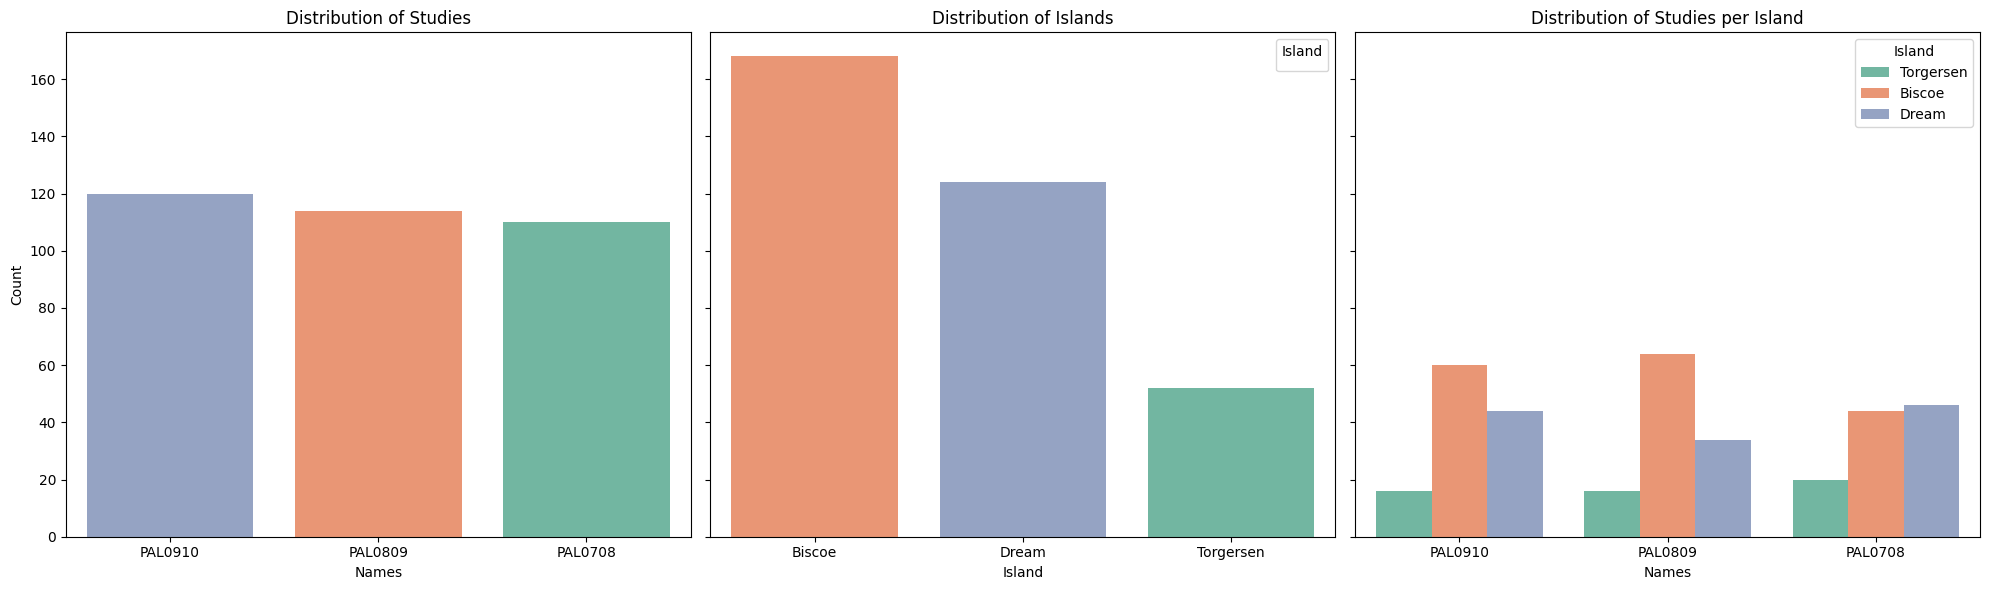

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)  
# Chart 1: Study Distribution
sns.countplot(
    x='studyName', 
    data=df, 
    order=df['studyName'].value_counts().index,
    palette="Set2",
    hue='studyName',
    ax=axes[0],  # Assign to the first subplot
    legend=False
)
axes[0].set_title('Distribution of Studies')
axes[0].set_xlabel('Names')
axes[0].set_ylabel('Count')

# Chart 2: Distribution of Islands
sns.countplot(
    x='Island', 
    data=df, 
    order=df['Island'].value_counts().index,
    palette='Set2',
    hue='Island',
    ax=axes[1]  # Assign to the second subplot
)
axes[1].set_title('Distribution of Islands')
axes[1].set_xlabel('Island')
axes[1].set_ylabel('')
axes[1].legend(title='Island', loc='upper right')

# Chart 3: Distribution of Studies per Island
sns.countplot(
    x='studyName', 
    data=df, 
    order=df['studyName'].value_counts().index,
    palette="Set2",
    hue='Island',
    ax=axes[2]  # Assign to the third subplot
)
axes[2].set_title('Distribution of Studies per Island')
axes[2].set_xlabel('Names')
axes[2].set_ylabel('')
axes[2].legend(title='Island', loc='upper right')

# Adjust layout and spacing
plt.tight_layout()
plt.show()


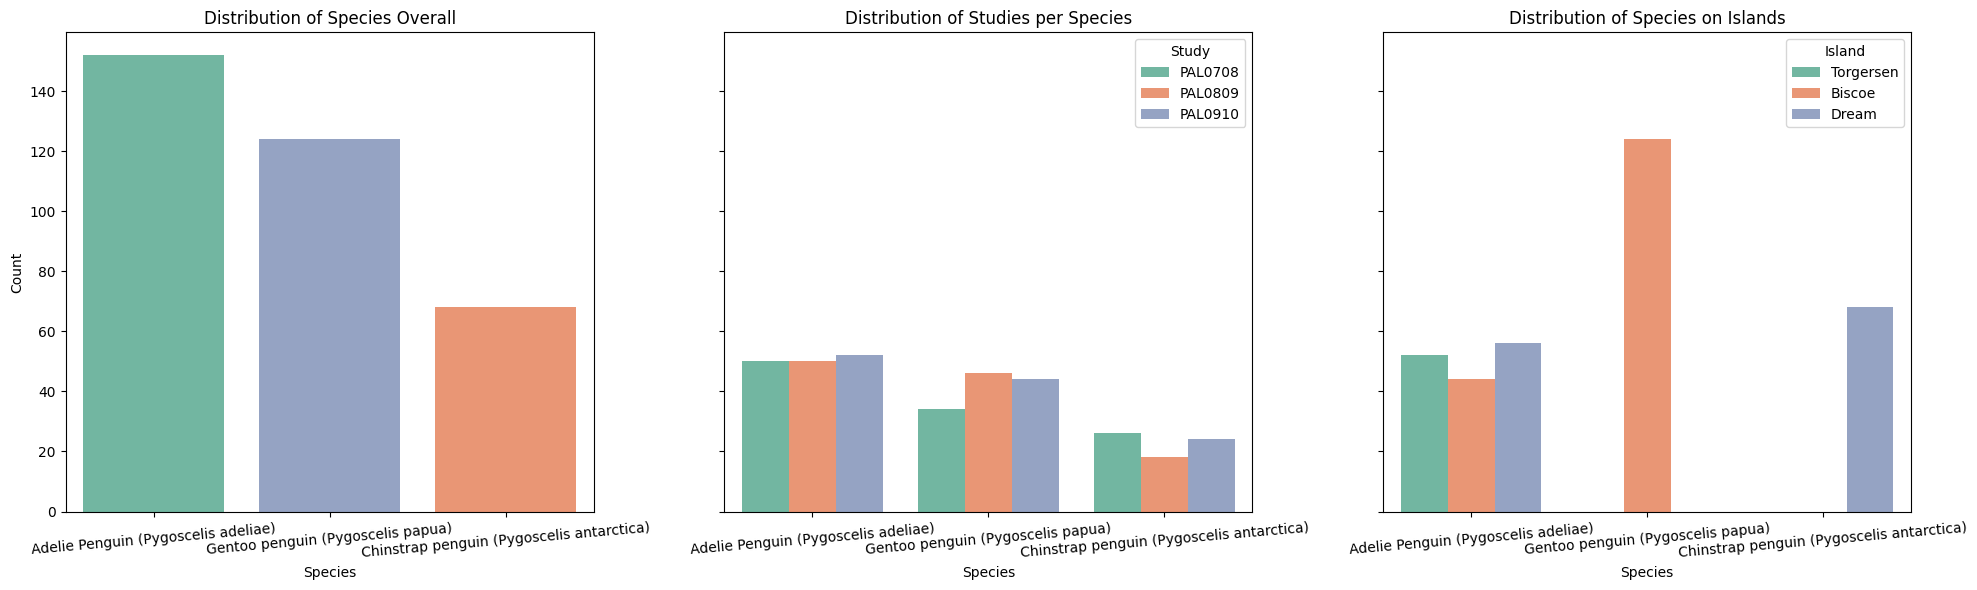

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True) 

# Chart 1: Distribution of Species Overall
sns.countplot(
    x='Species',
    data=df,
    order=df['Species'].value_counts().index,
    palette='Set2',
    hue='Species',
    ax=axes[0]  
)
axes[0].set_title('Distribution of Species Overall')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=5)

# Chart 2: Distribution of Species per Study
sns.countplot(
    x='Species',
    data=df,
    order=df['Species'].value_counts().index,
    palette='Set2',
    hue='studyName',
    ax=axes[1]  
)
axes[1].set_title('Distribution of Studies per Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=5)
axes[1].legend(title='Study', loc='upper right')

# Chart 3: Distribution of Species per Island
sns.countplot(
    x='Species',
    data=df,
    order=df['Species'].value_counts().index,
    palette='Set2',
    hue='Island',
    ax=axes[2]  
)
axes[2].set_title('Distribution of Species on Islands')
axes[2].set_xlabel('Species')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=5)
axes[2].legend(title='Island', loc='upper right')

plt.tight_layout()
plt.show()


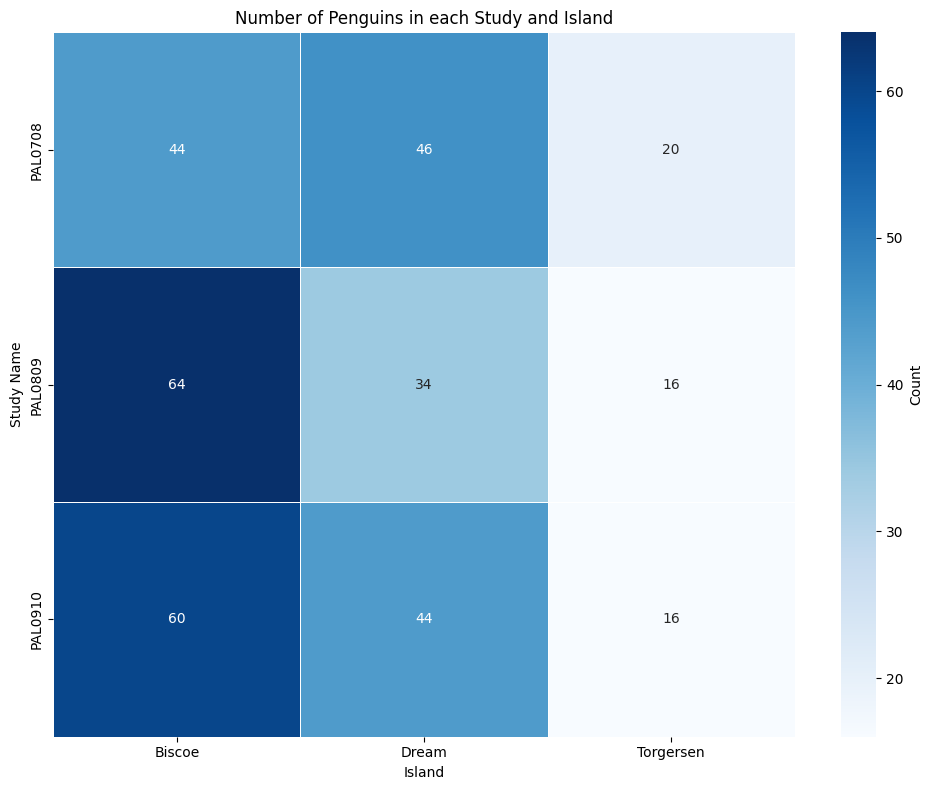

In [45]:
# Number of Penguins in Each Study and Island
heatmap_data = df.groupby(['studyName', 'Island']).size().reset_index(name='counts')
heatmap_pivot = heatmap_data.pivot(index='studyName', columns='Island', values='counts').fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_pivot,
    annot=True, 
    fmt='g',     
    cmap='Blues',  
    linewidths=0.5, 
    cbar_kws={'label': 'Count'} 
)
plt.title('Number of Penguins in each Study and Island')
plt.xlabel('Island')
plt.ylabel('Study Name')
plt.tight_layout()
plt.show()
